In [1]:
from tqdm import tqdm
from D3QNAgent import Agent
from kaggle_environments import evaluate, make, utils
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

env = make("connectx", debug=True)
env.render()

nstep_lookahead_agent = './fast_Nstep_lookahead_agent.py'
random_agent = 'random'
negamax_agent = 'negamax'

Loading environment football failed: No module named 'gfootball'


In [2]:
# def preprocess_board_state(observation):
#     board = np.array(observation['board'], dtype=np.float32)
#     marker = observation.mark
#     if marker == 1:
#         board[board == 1] = -1
#         board[board == 2] = 1
        
#     else:
#         board[board == 1] = 1
#         board[board == 2] = -1

#     return np.array(board, dtype=np.float32).reshape(6, 7, 1)
#     # return board



def preprocess_board_state(observation):
    board = np.array(observation['board'], dtype=np.float32).reshape(6, 7)
    marker = observation.mark

    state = np.zeros((6, 7, 2), dtype=np.float32)
    
    if marker == 1:
        state[:, :, 0][board == 1] = 1
        state[:, :, 1][board == 2] = 1
        
    else:
        state[:, :, 0][board == 2] = 1
        state[:, :, 1][board == 1] = 1

    return state

In [3]:
from D3QNAgent import Agent

def my_agent(obs, config):
    # define agent
    agent = Agent(
        env.configuration, 
        input_shape=(None, 6, 7, 2),
        testing=True,
    )
    agent.load_DQN_weights('./models/cnn-random-5000-negamax-5000.h5')

    # preprocessing of the state
    state = preprocess_board_state(obs)

    return agent.choose_action(state)

In [ ]:
env.reset()
# Play as the first agent against default "random" agent.
env.run([negamax_agent, my_agent])
env.render(mode="ipython", width=500, height=450)

In [ ]:
env.reset()
# Play as the first agent against default "random" agent.
env.run([my_agent, nstep_lookahead_agent])
env.render(mode="ipython", width=500, height=450)

In [5]:
def mean_reward(rewards):
    return sum(r[0] for r in rewards) / float(len(rewards))
    
# # Run multiple episodes to estimate its performance.
print("My Agent vs Random Agent:", mean_reward(evaluate("connectx", [my_agent, "random"], num_episodes=100)))
print("My Agent vs Negamax Agent:", mean_reward(evaluate("connectx", [my_agent, "negamax"], num_episodes=100)))
print("My Agent vs N-step lookahead Agent:", mean_reward(evaluate("connectx", [my_agent, nstep_lookahead_agent], num_episodes=100)))

My Agent vs Random Agent: 0.45
My Agent vs Negamax Agent: -0.73
My Agent vs N-step lookahead Agent: -1.0


In [8]:
print("My Agent vs Random Agent:", mean_reward(evaluate("connectx", [ "random", my_agent], num_episodes=100)))
print("My Agent vs Negamax Agent:", mean_reward(evaluate("connectx", ["negamax", my_agent], num_episodes=100)))
print("My Agent vs N-step lookahead Agent:", mean_reward(evaluate("connectx", [nstep_lookahead_agent, my_agent], num_episodes=100)))

My Agent vs Random Agent: -0.28
My Agent vs Negamax Agent: 0.53
My Agent vs N-step lookahead Agent: 1.0


Text(0.5, 1.0, 'RL Agent Performance Against Logical Opponents in 100 matches')

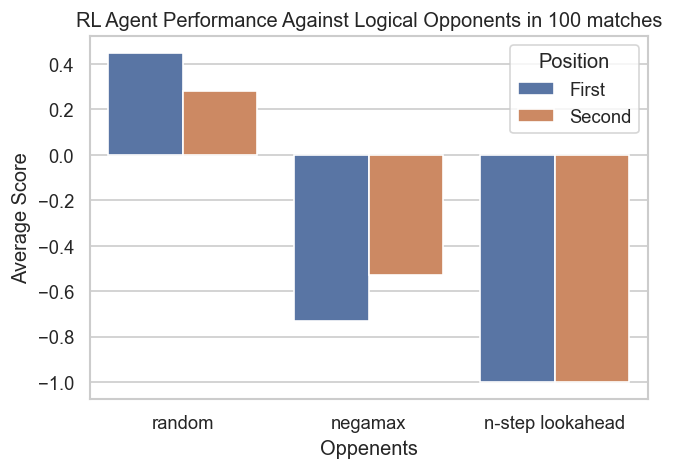

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(dpi=120)

d = {
    'Opponent': ['random', 'negamax', 'n-step lookahead', 'random', 'negamax', 'n-step lookahead'],
    'Score': [.45, -0.73, -1.0, .28, -0.53, -1.0],
    'Position': ['First', 'First', 'First', 'Second', 'Second', 'Second']
}

df = pd.DataFrame(data=d)
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='Opponent', y='Score', hue='Position', data=df)
ax.set_xlabel('Oppenents')
ax.set_ylabel('Average Score')
ax.set_title('RL Agent Performance Against Logical Opponents in 100 matches')

In [19]:
env.reset()
# Play as the first agent against default "random" agent.
env.run([my_agent, random_agent])
env.render(mode="ipython", width=500, height=450)

In [20]:
agent = Agent(
        env.configuration, 
        input_shape=(None, 6, 7, 2),
        testing=True,
    )
agent.load_DQN_weights('./models/cnn-random-5000-negamax-5000.h5')

agent.online.summary()


Model: "dqn_6584"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6584 (Conv2D)         multiple                  528       
_________________________________________________________________
max_pooling2d_6584 (MaxPooli multiple                  0         
_________________________________________________________________
flatten_6584 (Flatten)       multiple                  0         
_________________________________________________________________
dense_26336 (Dense)          multiple                  4224      
_________________________________________________________________
dense_26337 (Dense)          multiple                  16512     
_________________________________________________________________
dense_26338 (Dense)          multiple                  129       
_________________________________________________________________
dense_26339 (Dense)          multiple                  903

In [28]:
def decay(arr, r):
    e = np.exp((r-1)*arr)
    return np.maximum(e, 0.02)

eps = decay(np.arange(start=0, stop=7500), 0.99925)


Text(0.5, 1.0, '$\\epsilon$ Decay Over Number of Episodes, r=0.99925, $\\epsilon_{\\min}=0.02$')

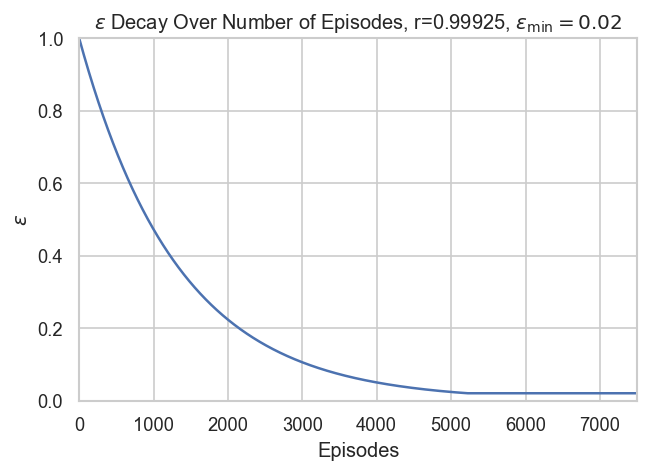

In [33]:

fig, ax = plt.subplots(dpi=120)
ax.plot(eps, linestyle='-')
ax.set_xlabel('Episodes')
ax.set_ylabel('$\epsilon$')
ax.set_ylim(0, 1)
ax.set_xlim(0, 7500)
ax.set_title('$\epsilon$ Decay Over Number of Episodes, r=0.99925, $\epsilon_{\min}=0.02$')